# Average CO2 emissions of households on their energy consumption, by income decile

# Import general modules

In [1]:
from __future__ import division

import pandas
import seaborn


# Import modules specific to OpenFisca

In [8]:
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_line
from openfisca_france_indirect_taxation.surveys import SurveyScenario
from openfisca_france_indirect_taxation.almost_ideal_demand_system.aids_estimation_from_stata import get_elasticities
from openfisca_france_indirect_taxation.examples.calage_bdf_cn_energy import get_inflators_by_year_energy

# Import new colors

In [3]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Simulate average CO2 emissions by income decile

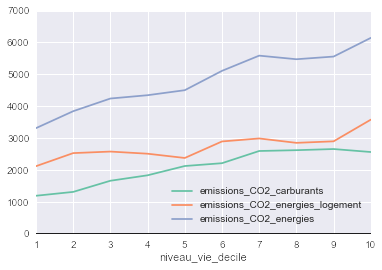

In [12]:
# Sélection des variables utilisées pour la simulation

inflators_by_year = get_inflators_by_year_energy(rebuild = False)
year = 2012
data_year = 2005
elasticities = get_elasticities(data_year)
inflation_kwargs = dict(inflator_by_variable = inflators_by_year[year])
del inflation_kwargs['inflator_by_variable']['somme_coicop12']

simulated_variables = ['emissions_CO2_carburants', 'emissions_CO2_energies_logement', 'emissions_CO2_energies']

survey_scenario = SurveyScenario.create(
    elasticities = elasticities,
    inflation_kwargs = inflation_kwargs,
    reform_key = 'taxe_carbone',
    year = year,
    data_year = data_year
    )
pivot_table = pandas.DataFrame()
for values in simulated_variables:
    pivot_table = pandas.concat([
        pivot_table,
        survey_scenario.compute_pivot_table(values = [values], columns = ['niveau_vie_decile'])
        ])
df = pivot_table.T

# Réalisation de graphiques
graph_builder_line(df)
